# PUBG Finish Placement Prediction

## Objective of project

Battle Royale-style video games have taken the world by storm. 100 players are dropped onto an island empty-handed and must explore, scavenge, and eliminate other players until only one is left standing, all while the play zone continues to shrink. Player Unknown's Battle Grounds (PUBG) has enjoyed massive popularity. With over 50 million copies sold, it's the fifth best selling game of all time, and has millions of active monthly players. The Objective of this project is to predict, in solo mode, the final placement and understand best strategy in this game based on the data collected from PUBG via PUBG Developer API. 
 

## Approach:
-  Perform EDA to have a better understanding of the data
-  Preprocess the data using normalization, removing the unnecessary data points (e.g. group-mode or robots) or columns (e.g. id )
-  Imply feature selection techniques to extract the most useful attributes for modelling
-  Build regression of models in multiple regression (ridge/lasso), random forest, neural network, support vector machine, ensemble and boosting methods to predict the final placement
-  Evaluate the models using the RMSE and explained variance metrics 

***
## Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np
rand_st = 920

In [32]:
df = pd.read_csv('PUBG.csv', na_values=['?'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


#### Checking missing values

In [34]:
print(df.shape)
df.isnull().sum()

(4446966, 29)


Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

only oen row missing target value (winPlacePerc)

#### Drop the missing values

In [35]:
df.dropna(inplace=True)

#### Get rid of IDs' columns

In [36]:
df = df.drop(axis=1, columns=['Id', 'groupId', 'matchId'])

#### Select only solo-mode data points
This project only discuss solo mode in PUBG game.

In [37]:
df = df[df['matchType']=='solo-fpp']
df = df.drop(axis=1, columns=['matchType'])

In [38]:
df.shape

(536761, 25)

#### Take a look into the data set

In [39]:
df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,0,0,100.000,0,0,0,45,0,1,1,...,0,0.0,0,0.00,0,0,49.75,2,0,0.1875
7,0,0,8.538,0,0,0,48,1000,0,0,...,0,2004.0,0,0.00,0,0,1089.00,6,1500,0.7368
13,0,1,324.200,0,1,5,5,986,4,1,...,0,1228.0,0,76.84,0,0,2050.00,6,1462,0.8750
17,0,3,254.300,0,0,12,13,0,2,1,...,0,2367.0,0,15.29,0,0,1787.00,3,0,0.8211
35,0,0,136.900,0,0,0,37,0,1,1,...,0,0.0,0,0.00,0,0,270.70,1,0,0.3474


## save the solo mode data to csv

In [40]:
df.to_csv('solo.csv',index=False)

## Statistical Description

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,536761.0,0.057640,0.245489,0.0,0.0000,0.0000,0.0000,5.0
boosts,536761.0,1.058980,1.791553,0.0,0.0000,0.0000,2.0000,28.0
damageDealt,536761.0,118.918804,158.345782,0.0,0.0000,75.7900,171.0000,2305.0
DBNOs,536761.0,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0
headshotKills,536761.0,0.251553,0.633480,0.0,0.0000,0.0000,0.0000,16.0
heals,536761.0,1.009678,2.383454,0.0,0.0000,0.0000,1.0000,63.0
killPlace,536761.0,48.025596,27.579939,1.0,24.0000,48.0000,72.0000,100.0
killPoints,536761.0,460.651884,606.861920,0.0,0.0000,0.0000,1120.0000,1970.0
kills,536761.0,0.934731,1.495987,0.0,0.0000,0.0000,1.0000,23.0
killStreaks,536761.0,0.482457,0.556407,0.0,0.0000,0.0000,1.0000,5.0


1. The scales of attributes vary a lot, we might needs normalization to scale them
2. The five number summary show little information of distributions, we need to visualize them

## Distribution Plots

### Target variable

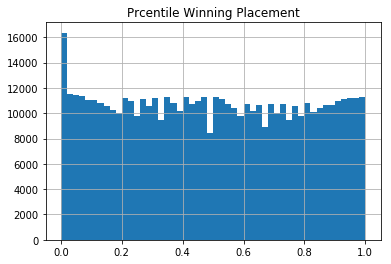

In [41]:
import matplotlib.pyplot as plt
df['winPlacePerc'].hist(bins=50)
plt.title('Prcentile Winning Placement')
print('')

The above plot depicts target variable's distribution is pretty uniform. 

### Predictor

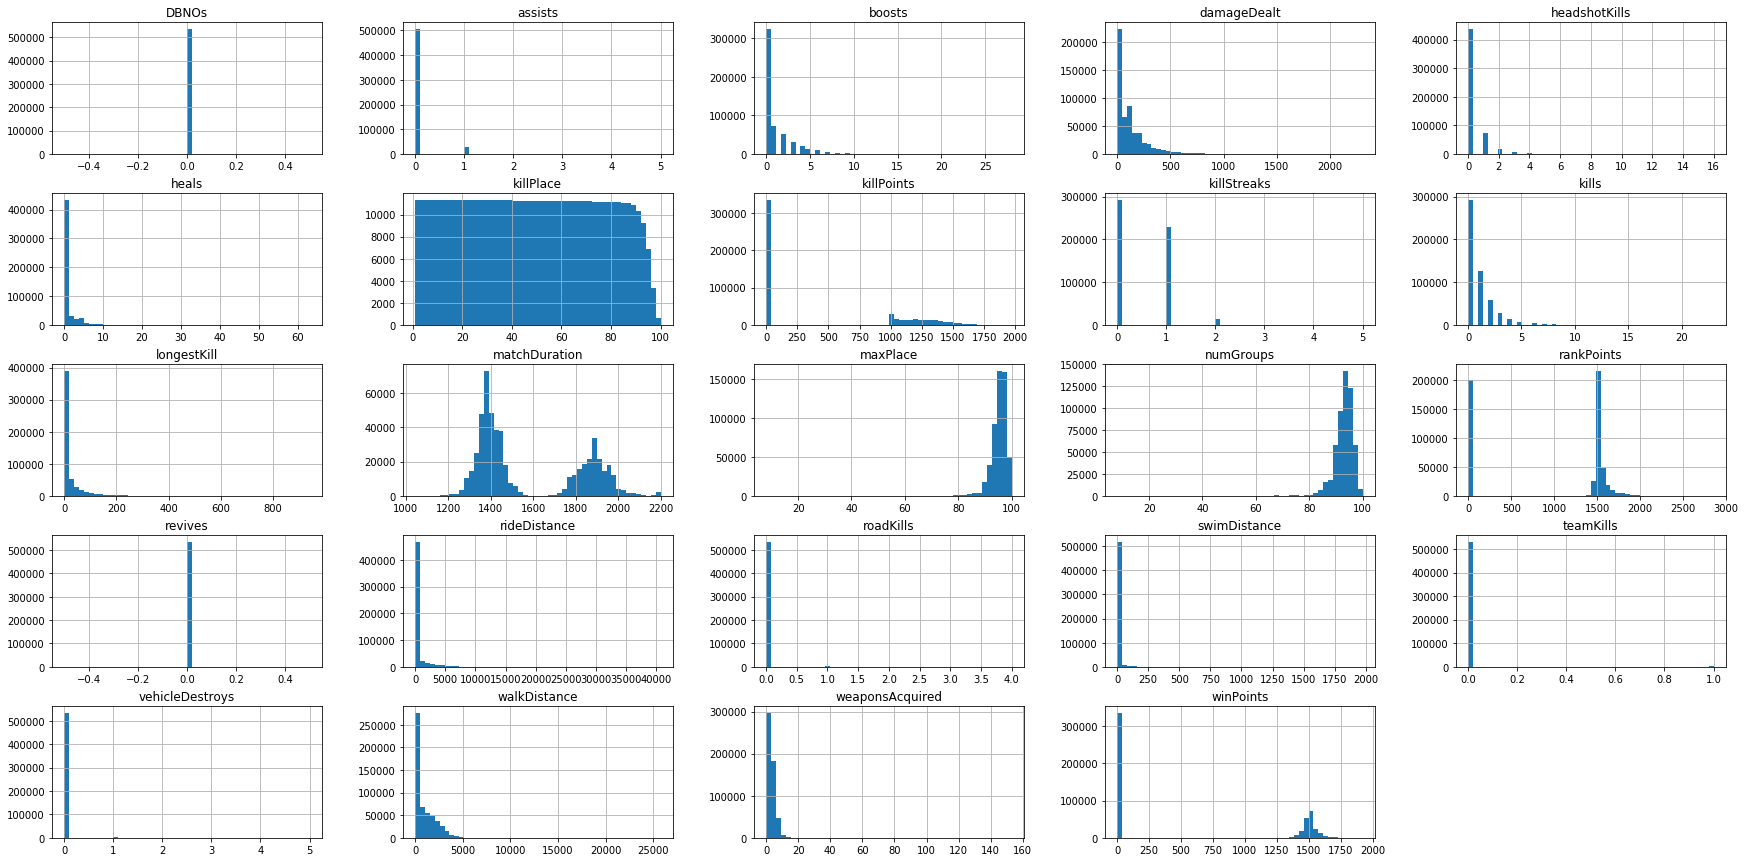

In [13]:
df.iloc[:,0:24].hist(figsize=(30,15),layout=(5,5), bins=50)
print('')

1. Two variables (DBNOs and revives) are completely 0. 
2. The match duration is bi-normal distritributed
3. 

## Correlation

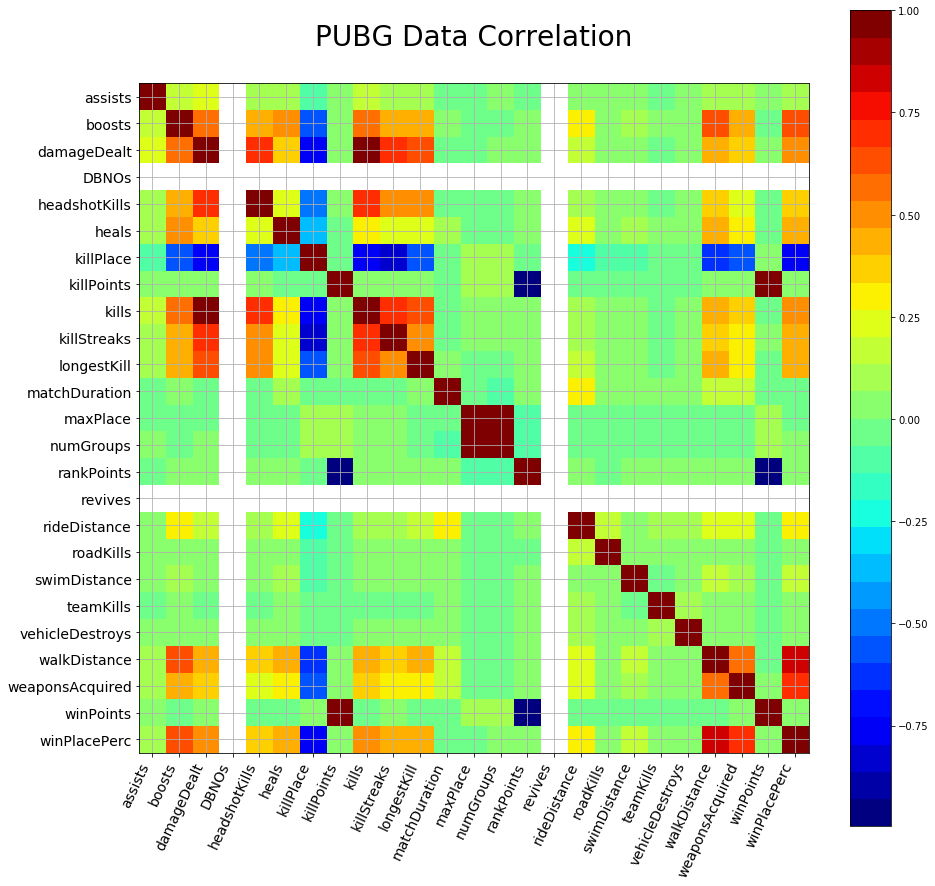

In [14]:
def correlation_matrix(df,title):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title(title+'\n',fontsize=28)
    labels=list(df)
    ax1.set_xticks([i for i in range(len(labels))])
    ax1.set_xticklabels(labels,fontsize=14,rotation=65, horizontalalignment="right")
    ax1.set_yticks([i for i in range(len(labels))])
    ax1.set_yticklabels(labels,fontsize=14)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1.0,-0.75,-0.5,-0.25,.0,.25,.50,.75,1])
    plt.show()

correlation_matrix(df,'PUBG Data Correlation')

***
## Preprocessing

In [2]:
import pandas as pd 
import numpy as np
import math
rand_st = 920

In [3]:
df = pd.read_csv('solo.csv')

In [4]:
df.shape

(536761, 25)

In [3]:
from sklearn.model_selection import cross_validate, train_test_split
rand_st = 920

In [4]:
header = list(df)

#### Separate target (winPlacePerc) from predictors

In [5]:
data, target = df[[col for col in list(df) if col != 'winPlacePerc']], df[['winPlacePerc']]
print(data.shape, target.shape)

(536761, 24) (536761, 1)


#### Hold out a part of data as test set

In [6]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.4, random_state=rand_st)

#### Setting preprocessing parameters

In [7]:
norm_target = 0
norm_features = 1

#### Find and eliminate bots 
Based on the experience, a player never walk a meter and being placed in first 50 percentile is a bot. 

In [8]:
data_train.shape

(322056, 24)

In [9]:
win_greater_50 = data_train[target_train['winPlacePerc']>0.5]
win_greater_50.shape

(156080, 24)

In [10]:
bot = win_greater_50[win_greater_50['walkDistance']==0.0]
bot.shape

(132, 24)

132 data points are bots.

#### Remove the bots in training set

In [11]:
data_train.drop(index=bot.index.values, inplace=True)
target_train.drop(index=bot.index.values, inplace=True)

/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
data_train.shape

(321924, 24)

#### Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
if norm_target==1:
    #Target normalization for continuous values
    y_scaler = MinMaxScaler().fit(target_train)
    target_train = y_scaler.transform(target_train)
    target_test = y_scaler.transform(target_test)

if norm_features==1:
    #Feature normalization for continuous values
    x_scaler = MinMaxScaler().fit(np.array(data_train))
    data_train = x_scaler.transform(np.array(data_train))
    data_test = x_scaler.transform(np.array(data_test))
print('X: ', data_train.shape, target_train.shape)
print('Y: ', data_test.shape, target_test.shape)

X:  (321924, 24) (321924, 1)
Y:  (214705, 24) (214705, 1)


In [15]:
target_train = np.array(target_train).reshape(target_train.shape[0])
target_test = np.array(target_test).reshape(target_test.shape[0])
print('X: ', data_train.shape, target_train.shape)
print('Y: ', data_test.shape, target_test.shape)

X:  (321924, 24) (321924,)
Y:  (214705, 24) (214705,)


In [16]:
data_train[:2,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.60606061, 0.        , 0.        , 0.        ,
        0.        , 0.26406926, 0.93478261, 0.91304348, 0.5311843 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04285817, 0.01960784, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8989899 , 0.        , 0.        , 0.        ,
        0.        , 0.27099567, 0.92391304, 0.91304348, 0.52592852,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00276504, 0.        , 0.        ]])

***
## Feature Selection

In [17]:
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif, chi2

from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

#### Setting feature selection parameters

In [20]:
lv_filter = 0
feat_start= 0
feat_select = 0
fs_type = 1
k_cnt = 5

#### Low Variance Filter Selection

In [19]:
%matplotlib inline
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    #LV Threshold
    sel = VarianceThreshold(threshold=0.01)                                      #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_train)
    fitted=sel.transform(data_train)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_train[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected', temp)
    print('Features (total, selected):', len(data_train[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index
    
    df[header].hist(figsize=(20,10),layout=(math.ceil(len(header)/3),3), bins=100)

#### Feature Selection

In [20]:
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    if fs_type==1:
        #Stepwise Recursive Backwards Feature removal
        rgr = DecisionTreeRegressor(random_state=rand_st)
        sel = RFE(rgr, n_features_to_select=k_cnt, step=.1)
        print('Stepwise Recursive Backwards - Random Forest: ')
            
        fit_mod=sel.fit(data_train, target_train)
        print(sel.ranking_)
        sel_idx=fit_mod.get_support()      

    if fs_type==2:
        #Wrapper Select via model
        rgr = DecisionTreeRegressor(random_state=rand_st)
        sel = SelectFromModel(rgr, prefit=False, threshold='mean')
        print ('Wrapper Select: ')
            
        fit_mod=sel.fit(data_train, target_train)    
        sel_idx=fit_mod.get_support()

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_train[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected', temp)
    print('Features (total/selected):', len(data_train[0]), len(temp))
    print('\n')
            
                
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
    
    df[header].hist(figsize=(20,5),layout=(2,3), bins=100)

In [21]:
data_train.shape

(321924, 24)

***
## Predictive Modeling

In [18]:
import time
import math

from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_validate, train_test_split
from sklearn import metrics

In [19]:
scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'}
perf1 = {'RMSE':[], 'Expl_Var':[]}

## Lasso Regression

In [25]:
start_ts=time.time()
rgr = Lasso(alpha =0.1, random_state=rand_st)
scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Lasso Regression RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Lasso Regression Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Lasso Regression RMSE: 0.30 (+/- 0.00)
Lasso Regression Expl Var: -0.00 (+/- 0.00)
CV Runtime: 2.0333149433135986


##################################################################################################################################################
## Ridge Regression - All attributes

In [24]:
start_ts=time.time()
rgr = Ridge(random_state=rand_st)
scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Ridge Regression RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Ridge Regression Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Ridge Regression RMSE: 0.09 (+/- 0.00)
Ridge Regression Expl Var: 0.90 (+/- 0.00)
CV Runtime: 1.6571903228759766


## Ridge Regression - Low Variance Filter

In [63]:
##1) Run Low Variance Filter #######

#Stepwise Recursive Backwards Feature removal
print('--LOW VARIANCE FILTER ON--', '\n')
#LV Threshold
sel = VarianceThreshold(threshold=0.01)                                      #Removes any feature with less than 20% variance
fit_mod=sel.fit(data_train)
fitted=sel.transform(data_train)
sel_idx=fit_mod.get_support()

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)

print('Selected', temp)
print('Features (total, selected):', len(data_train[0]), len(temp))
print('\n')

##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index

##4) run model
start_ts=time.time()
rgr = Ridge(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Ridge Regression RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Ridge Regression Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

--LOW VARIANCE FILTER ON-- 

Selected ['killPlace', 'killPoints', 'killStreaks', 'matchDuration', 'rankPoints', 'teamKills', 'winPoints']
Features (total, selected): 24 7


Ridge Regression RMSE: 0.14 (+/- 0.00)
Ridge Regression Expl Var: 0.79 (+/- 0.01)
CV Runtime: 0.5467061996459961


## Ridge Regression - Stepwise Recursive Backwards Feature removal

In [23]:
##1) Run Feature Selection #######

#Stepwise Recursive Backwards Feature removal
rgr = Ridge(random_state=rand_st)
sel = RFE(rgr, n_features_to_select=None, step=.1)
print('Stepwise Recursive Backwards - Ridge Regression: ')

fit_mod=sel.fit(data_train, target_train)
print(sel.ranking_)
sel_idx=fit_mod.get_support()      

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)
print('Selected', temp)
print('Features (total/selected):', len(data_train[0]), len(temp))
print('\n')


##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
print('-'*60)

##4) run model
start_ts=time.time()
rgr = Ridge(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Ridge Regression RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Ridge Regression Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Stepwise Recursive Backwards - Ridge Regression: 
[4 1 1 7 3 5 1 3 1 1 5 2 1 1 1 7 1 4 1 6 6 1 1 2]
Selected ['boosts', 'damageDealt', 'killPlace', 'kills', 'killStreaks', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance', 'swimDistance', 'walkDistance', 'weaponsAcquired']
Features (total/selected): 24 12


------------------------------------------------------------
Ridge Regression RMSE: 0.10 (+/- 0.00)
Ridge Regression Expl Var: 0.89 (+/- 0.00)
CV Runtime: 0.7751669883728027


## Ridge Regression - Wrapper Selection

In [56]:
##1) Run Feature Selection #######

#Wrapper Select via model
rgr = Ridge(random_state=rand_st)
sel = SelectFromModel(rgr, prefit=False, threshold='mean')
print ('Wrapper Select: ')

fit_mod=sel.fit(data_train, target_train)    
sel_idx=fit_mod.get_support()

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)
print('Selected', temp)
print('Features (total/selected):', len(data_train[0]), len(temp))
print('\n')


##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
print('-'*60)


##4) run model
start_ts=time.time()
rgr = Ridge(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Ridge Regression RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Ridge Regression Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Wrapper Select: 
Selected ['killPlace', 'kills', 'killStreaks', 'numGroups', 'rideDistance', 'walkDistance', 'weaponsAcquired']
Features (total/selected): 24 7


------------------------------------------------------------
Ridge Regression RMSE: 0.10 (+/- 0.00)
Ridge Regression Expl Var: 0.89 (+/- 0.00)
CV Runtime: 0.5486898422241211


##################################################################################################################################################
## Regression Tree - All attributes

In [26]:
start_ts=time.time()
# rgr = DecisionTreeRegressor(criterion='mse',
#                             splitter='best',
#                             max_depth=None,
#                             min_samples_split=2,
#                             min_samples_leaf=1,
#                             max_features=None,
#                             random_state=rand_st)
rgr = DecisionTreeRegressor(random_state=rand_st)
scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Decision Tree RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Decision Tree Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Decision Tree RMSE: 0.08 (+/- 0.00)
Decision Tree Expl Var: 0.92 (+/- 0.00)
CV Runtime: 52.58795619010925


## Regression Tree - Low Variance Filter

In [68]:
##1) Run Low Variance Filter #######

#Stepwise Recursive Backwards Feature removal
print('--LOW VARIANCE FILTER ON--', '\n')
#LV Threshold
sel = VarianceThreshold(threshold=0.01)                                      #Removes any feature with less than 20% variance
fit_mod=sel.fit(data_train)
fitted=sel.transform(data_train)
sel_idx=fit_mod.get_support()

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)

print('Selected', temp)
print('Features (total, selected):', len(data_train[0]), len(temp))
print('\n')

##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index

##4) run model
start_ts=time.time()
rgr = DecisionTreeRegressor(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Decision Tree RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Decision Tree Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

--LOW VARIANCE FILTER ON-- 

Selected ['killPlace', 'killPoints', 'killStreaks', 'matchDuration', 'rankPoints', 'teamKills', 'winPoints']
Features (total, selected): 24 7


Decision Tree RMSE: 0.15 (+/- 0.00)
Decision Tree Expl Var: 0.73 (+/- 0.01)
CV Runtime: 21.63052535057068


## Regression Tree - Stepwise Recursive Backwards Feature removal

In [24]:
##1) Run Feature Selection #######

#Stepwise Recursive Backwards Feature removal
rgr = DecisionTreeRegressor(random_state=rand_st)
sel = RFE(rgr, n_features_to_select=None, step=.1)
print('Stepwise Recursive Backwards - Regression Tree: ')

fit_mod=sel.fit(data_train, target_train)
print(sel.ranking_)
sel_idx=fit_mod.get_support()      

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)
print('Selected', temp)
print('Features (total/selected):', len(data_train[0]), len(temp))
print('\n')


##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
print('-'*60)

##4) run model
start_ts=time.time()
rgr = DecisionTreeRegressor(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Decision Tree RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Decision Tree Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Stepwise Recursive Backwards - Regression Tree: 
[5 1 1 7 4 3 1 3 1 2 1 1 1 1 1 7 1 6 4 5 6 1 1 2]
Selected ['boosts', 'damageDealt', 'killPlace', 'kills', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance', 'walkDistance', 'weaponsAcquired']
Features (total/selected): 24 12


------------------------------------------------------------
Decision Tree RMSE: 0.08 (+/- 0.00)
Decision Tree Expl Var: 0.92 (+/- 0.00)
CV Runtime: 40.19416546821594


## Regression Tree - Wrapper Selection

In [62]:
##1) Run Feature Selection #######

#Wrapper Select via model
rgr = DecisionTreeRegressor(random_state=rand_st)
sel = SelectFromModel(rgr, prefit=False, threshold='mean')
print ('Wrapper Select: ')

fit_mod=sel.fit(data_train, target_train)    
sel_idx=fit_mod.get_support()

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)
print('Selected', temp)
print('Features (total/selected):', len(data_train[0]), len(temp))
print('\n')


##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
print('-'*60)


##4) run model
start_ts=time.time()
rgr = DecisionTreeRegressor(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Decision Tree RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Decision Tree Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Wrapper Select: 
Selected ['killPlace', 'walkDistance']
Features (total/selected): 24 2


------------------------------------------------------------
Decision Tree RMSE: 0.10 (+/- 0.00)
Decision Tree Expl Var: 0.88 (+/- 0.00)
CV Runtime: 13.264935731887817


##################################################################################################################################################
## Random Forest Regressor - All Attributes

In [27]:
start_ts=time.time()
# rgr = RandomForestRegressor(n_estimators=10,
#                             max_features=.33,
#                             max_depth=None,
#                             min_samples_split=3,
#                             random_state=rand_st)
rgr = RandomForestRegressor(random_state=rand_st)
scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=10)  

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Random Forest RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Random Forest Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Random Forest RMSE: 0.06 (+/- 0.00)
Random Forest Expl Var: 0.96 (+/- 0.00)
CV Runtime: 333.44928884506226


## Random Forest Regressor - Low Variance Filter

In [69]:
##1) Run Low Variance Filter #######

#Stepwise Recursive Backwards Feature removal
print('--LOW VARIANCE FILTER ON--', '\n')
#LV Threshold
sel = VarianceThreshold(threshold=0.01)                                      #Removes any feature with less than 20% variance
fit_mod=sel.fit(data_train)
fitted=sel.transform(data_train)
sel_idx=fit_mod.get_support()

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)

print('Selected', temp)
print('Features (total, selected):', len(data_train[0]), len(temp))
print('\n')

##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index

##4) run model
start_ts=time.time()
rgr = RandomForestRegressor(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Random Forest RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Random Forest Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

--LOW VARIANCE FILTER ON-- 

Selected ['killPlace', 'killPoints', 'killStreaks', 'matchDuration', 'rankPoints', 'teamKills', 'winPoints']
Features (total, selected): 24 7


Random Forest RMSE: 0.12 (+/- 0.00)
Random Forest Expl Var: 0.84 (+/- 0.01)
CV Runtime: 144.83263492584229


## Random Forest Regressor - Stepwise Recursive Backwards Feature removal

In [70]:
##1) Run Feature Selection #######

#Stepwise Recursive Backwards Feature removal
rgr = RandomForestRegressor(random_state=rand_st)
sel = RFE(rgr, n_features_to_select=None, step=.1)
print('Stepwise Recursive Backwards - Random Forest: ')

fit_mod=sel.fit(data_train, target_train)
print(sel.ranking_)
sel_idx=fit_mod.get_support()      

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)
print('Selected', temp)
print('Features (total/selected):', len(data_train[0]), len(temp))
print('\n')


##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
print('-'*60)

##4) run model
start_ts=time.time()
rgr = RandomForestRegressor(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Random Forest RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Random Forest Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Stepwise Recursive Backwards - Random Forest: 
[5 1 1 7 4 3 1 3 1 2 1 1 1 1 1 7 1 6 4 5 6 1 1 2]
Selected ['boosts', 'damageDealt', 'killPlace', 'kills', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance', 'walkDistance', 'weaponsAcquired']
Features (total/selected): 24 12


------------------------------------------------------------
Random Forest RMSE: 0.06 (+/- 0.00)
Random Forest Expl Var: 0.96 (+/- 0.00)
CV Runtime: 259.31674551963806


## Random Forest Regressor - Wrapper Selection

In [67]:
##1) Run Feature Selection #######

#Wrapper Select via model
rgr = RandomForestRegressor(random_state=rand_st)
sel = SelectFromModel(rgr, prefit=False, threshold='mean')
print ('Wrapper Select: ')

fit_mod=sel.fit(data_train, target_train)    
sel_idx=fit_mod.get_support()

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)
print('Selected', temp)
print('Features (total/selected):', len(data_train[0]), len(temp))
print('\n')


##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
print('-'*60)


##4) run model
start_ts=time.time()
rgr = RandomForestRegressor(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Random Forest RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Random Forest Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Wrapper Select: 
Selected ['killPlace', 'walkDistance']
Features (total/selected): 24 2


------------------------------------------------------------
Random Forest RMSE: 0.09 (+/- 0.00)
Random Forest Expl Var: 0.91 (+/- 0.00)
CV Runtime: 92.47164344787598


##################################################################################################################################################
## Bagging (RT) - All Attributes

In [28]:
RMSE, Expl_Var = [],[]
start_ts=time.time()
for i in range(5):
    ####Regressors####
    #SciKit Bagging Regressor - Cross Val
#     rgr = DecisionTreeRegressor(criterion='mse',
#                                 splitter='best',
#                                 max_depth=None,
#                                 min_samples_split=2,
#                                 min_samples_leaf=1,
#                                 max_features=None,
#                                 random_state=rand_st)  
    rgr = DecisionTreeRegressor(random_state=rand_st) 
    bag = BaggingRegressor(base_estimator=rgr, max_samples=0.6, random_state=rand_st) 
    bag.fit(data_train, target_train) 

    scores_RMSE = math.sqrt(metrics.mean_squared_error(target_test, bag.predict(data_test)))

    RMSE.append(scores_RMSE)
    scores_Expl_Var = metrics.explained_variance_score(target_test, bag.predict(data_test))

    Expl_Var.append(scores_Expl_Var)


perf1['RMSE'].append(np.array(scores_RMSE).mean())
perf1['Expl_Var'].append(np.array(scores_Expl_Var).mean())

print("Bagging Regressor RMSE: %0.2f (+/- %0.2f)" % ((np.array(RMSE).mean()), (np.array(RMSE).std() * 2)))
print("Bagging Regressor Expl Var: %0.2f (+/- %0.2f)" % ((np.array(Expl_Var).mean()), (np.array(Expl_Var).std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Bagging Regressor RMSE: 0.06 (+/- 0.00)
Bagging Regressor Expl Var: 0.96 (+/- 0.00)
CV Runtime: 128.8214054107666


## Bagging (RT) - Low Variance Filter

In [29]:
##1) Run Low Variance Filter #######

#Stepwise Recursive Backwards Feature removal
print('--LOW VARIANCE FILTER ON--', '\n')
#LV Threshold
sel = VarianceThreshold(threshold=0.01)                                      #Removes any feature with less than 20% variance
fit_mod=sel.fit(data_train)
fitted=sel.transform(data_train)
sel_idx=fit_mod.get_support()

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)

print('Selected', temp)
print('Features (total, selected):', len(data_train[0]), len(temp))
print('\n')

##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index

##4) run model
RMSE, Expl_Var = [],[]
start_ts=time.time()
for i in range(5):
    ####Regressors####
    #SciKit Bagging Regressor - Cross Val
    rgr = DecisionTreeRegressor(random_state=rand_st) 
    bag = BaggingRegressor(base_estimator=rgr, max_samples=0.6, random_state=rand_st) 
    bag.fit(temp_data_train, target_train) 

    scores_RMSE = math.sqrt(metrics.mean_squared_error(target_test, bag.predict(data_test)))

    RMSE.append(scores_RMSE)
    scores_Expl_Var = metrics.explained_variance_score(target_test, bag.predict(data_test))

    Expl_Var.append(scores_Expl_Var)


perf1['RMSE'].append(np.array(scores_RMSE).mean())
perf1['Expl_Var'].append(np.array(scores_Expl_Var).mean())

print("Bagging Regressor RMSE: %0.2f (+/- %0.2f)" % ((np.array(RMSE).mean()), (np.array(RMSE).std() * 2)))
print("Bagging Regressor Expl Var: %0.2f (+/- %0.2f)" % ((np.array(Expl_Var).mean()), (np.array(Expl_Var).std() * 2)))
print("CV Runtime:", time.time()-start_ts)

--LOW VARIANCE FILTER ON-- 

Selected ['killPlace', 'killPoints', 'killStreaks', 'matchDuration', 'rankPoints', 'teamKills', 'winPoints']
Features (total, selected): 24 7


Bagging Regressor RMSE: 0.54 (+/- 0.00)
Bagging Regressor Expl Var: -0.46 (+/- 0.00)
CV Runtime: 46.93961477279663


## Bagging (RT) - Stepwise Recursive Backwards Feature removal

In [26]:
##1) Run Feature Selection #######

#Stepwise Recursive Backwards Feature removal
rgr = DecisionTreeRegressor(random_state=rand_st)
sel = RFE(rgr, n_features_to_select=None, step=.1)
print('Stepwise Recursive Backwards - Regression Tree: ')

fit_mod=sel.fit(data_train, target_train)
print(sel.ranking_)
sel_idx=fit_mod.get_support()      

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)
print('Selected', temp)
print('Features (total/selected):', len(data_train[0]), len(temp))
print('\n')


##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
print('-'*60)

##4) run model
RMSE, Expl_Var = [],[]
start_ts=time.time()
for i in range(5):
    ####Regressors####
    #SciKit Bagging Regressor - Cross Val
    rgr = DecisionTreeRegressor(random_state=rand_st) 
    bag = BaggingRegressor(base_estimator=rgr, max_samples=0.6, random_state=rand_st) 
    bag.fit(temp_data_train, target_train) 

    scores_RMSE = math.sqrt(metrics.mean_squared_error(target_test, bag.predict(data_test)))

    RMSE.append(scores_RMSE)
    scores_Expl_Var = metrics.explained_variance_score(target_test, bag.predict(data_test))

    Expl_Var.append(scores_Expl_Var)


perf1['RMSE'].append(np.array(scores_RMSE).mean())
perf1['Expl_Var'].append(np.array(scores_Expl_Var).mean())

print("Bagging Regressor RMSE: %0.2f (+/- %0.2f)" % ((np.array(RMSE).mean()), (np.array(RMSE).std() * 2)))
print("Bagging Regressor Expl Var: %0.2f (+/- %0.2f)" % ((np.array(Expl_Var).mean()), (np.array(Expl_Var).std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Stepwise Recursive Backwards - Regression Tree: 
[5 1 1 7 4 3 1 3 1 2 1 1 1 1 1 7 1 6 4 5 6 1 1 2]
Selected ['boosts', 'damageDealt', 'killPlace', 'kills', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance', 'walkDistance', 'weaponsAcquired']
Features (total/selected): 24 12


------------------------------------------------------------
Bagging Regressor RMSE: 0.30 (+/- 0.00)
Bagging Regressor Expl Var: 0.09 (+/- 0.00)
CV Runtime: 93.5814700126648


## Bagging (RT) - Wrapper Selection

In [30]:
##1) Run Feature Selection #######

#Wrapper Select via model
rgr = DecisionTreeRegressor(random_state=rand_st)
sel = SelectFromModel(rgr, prefit=False, threshold='mean')
print ('Wrapper Select: ')

fit_mod=sel.fit(data_train, target_train)    
sel_idx=fit_mod.get_support()

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)
print('Selected', temp)
print('Features (total/selected):', len(data_train[0]), len(temp))
print('\n')


##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
print('-'*60)


##4) run model
RMSE, Expl_Var = [],[]
start_ts=time.time()
for i in range(5):
    ####Regressors####
    #SciKit Bagging Regressor - Cross Val
    rgr = DecisionTreeRegressor(random_state=rand_st) 
    bag = BaggingRegressor(base_estimator=rgr, max_samples=0.6, random_state=rand_st) 
    bag.fit(temp_data_train, target_train) 

    scores_RMSE = math.sqrt(metrics.mean_squared_error(target_test, bag.predict(data_test)))

    RMSE.append(scores_RMSE)
    scores_Expl_Var = metrics.explained_variance_score(target_test, bag.predict(data_test))

    Expl_Var.append(scores_Expl_Var)


perf1['RMSE'].append(np.array(scores_RMSE).mean())
perf1['Expl_Var'].append(np.array(scores_Expl_Var).mean())

print("Bagging Regressor RMSE: %0.2f (+/- %0.2f)" % ((np.array(RMSE).mean()), (np.array(RMSE).std() * 2)))
print("Bagging Regressor Expl Var: %0.2f (+/- %0.2f)" % ((np.array(Expl_Var).mean()), (np.array(Expl_Var).std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Wrapper Select: 
Selected ['killPlace', 'walkDistance']
Features (total/selected): 24 2


------------------------------------------------------------
Bagging Regressor RMSE: 0.30 (+/- 0.00)
Bagging Regressor Expl Var: 0.16 (+/- 0.00)
CV Runtime: 27.532679557800293


##################################################################################################################################################
## Gradient Boosting - All attributes

In [29]:
start_ts=time.time()
# rgr= GradientBoostingRegressor(n_estimators=10,
#                                loss='ls',
#                                learning_rate=.1,
#                                max_depth=3,
#                                min_samples_split=3,
#                                random_state=rand_st)
rgr= GradientBoostingRegressor(random_state=rand_st)
scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=10)                                                                                                  

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(np.array(scores_RMSE).mean())
perf1['Expl_Var'].append(np.array(scores_Expl_Var).mean())

print("Gradient Boosting RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Gradient Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Gradient Boosting RMSE: 0.07 (+/- 0.00)
Gradient Boosting Expl Var: 0.95 (+/- 0.00)
CV Runtime: 526.9824743270874


## Gradient Boosting - Low Variance Filter

In [74]:
##1) Run Low Variance Filter #######

#Stepwise Recursive Backwards Feature removal
print('--LOW VARIANCE FILTER ON--', '\n')
#LV Threshold
sel = VarianceThreshold(threshold=0.01)                                      #Removes any feature with less than 20% variance
fit_mod=sel.fit(data_train)
fitted=sel.transform(data_train)
sel_idx=fit_mod.get_support()

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)

print('Selected', temp)
print('Features (total, selected):', len(data_train[0]), len(temp))
print('\n')

##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index

##4) run model
start_ts=time.time()
rgr = GradientBoostingRegressor(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Gradient Boosting RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Gradient Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

--LOW VARIANCE FILTER ON-- 

Selected ['killPlace', 'killPoints', 'killStreaks', 'matchDuration', 'rankPoints', 'teamKills', 'winPoints']
Features (total, selected): 24 7


Gradient Boosting RMSE: 0.11 (+/- 0.00)
Gradient Boosting Expl Var: 0.86 (+/- 0.00)
CV Runtime: 181.9319462776184


## Gradient Boosting - Stepwise Recursive Backwards Feature removal

In [27]:
##1) Run Feature Selection #######

#Stepwise Recursive Backwards Feature removal
rgr = GradientBoostingRegressor(random_state=rand_st)
sel = RFE(rgr, n_features_to_select=None, step=.1)
print('Stepwise Recursive Backwards - Gradient Boosting: ')

fit_mod=sel.fit(data_train, target_train)
print(sel.ranking_)
sel_idx=fit_mod.get_support()      

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)
print('Selected', temp)
print('Features (total/selected):', len(data_train[0]), len(temp))
print('\n')


##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
print('-'*60)

##4) run model
start_ts=time.time()
rgr = GradientBoostingRegressor(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Gradient Boosting RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Gradient Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Stepwise Recursive Backwards - Gradient Boosting: 
[2 1 5 7 6 3 1 3 1 1 4 1 1 1 1 5 1 6 1 4 7 1 1 2]
Selected ['boosts', 'killPlace', 'kills', 'killStreaks', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance', 'swimDistance', 'walkDistance', 'weaponsAcquired']
Features (total/selected): 24 12


------------------------------------------------------------
Gradient Boosting RMSE: 0.07 (+/- 0.00)
Gradient Boosting Expl Var: 0.95 (+/- 0.00)
CV Runtime: 307.12091302871704


## Gradient Boosting - Wrapper Selection

In [76]:
##1) Run Feature Selection #######

#Wrapper Select via model
rgr = GradientBoostingRegressor(random_state=rand_st)
sel = SelectFromModel(rgr, prefit=False, threshold='mean')
print ('Wrapper Select: ')

fit_mod=sel.fit(data_train, target_train)    
sel_idx=fit_mod.get_support()

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)
print('Selected', temp)
print('Features (total/selected):', len(data_train[0]), len(temp))
print('\n')


##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
print('-'*60)


##4) run model
start_ts=time.time()
rgr = GradientBoostingRegressor(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Gradient Boosting RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Gradient Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Wrapper Select: 
Selected ['boosts', 'killPlace', 'kills', 'killStreaks', 'matchDuration', 'numGroups', 'rideDistance', 'walkDistance']
Features (total/selected): 24 8


------------------------------------------------------------
Gradient Boosting RMSE: 0.07 (+/- 0.00)
Gradient Boosting Expl Var: 0.95 (+/- 0.00)
CV Runtime: 217.71349596977234


##################################################################################################################################################
## Ada Boosting - All Attributes

In [59]:
start_ts=time.time()
# rgr= AdaBoostRegressor(n_estimators=10,
#                        base_estimator=None,
#                        loss = 'linear',
#                        learning_rate=.5,
#                        random_state=rand_st)
rgr= AdaBoostRegressor(random_state=rand_st)
scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=10)                                                                                                  

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(np.array(scores_RMSE).mean())
perf1['Expl_Var'].append(np.array(scores_Expl_Var).mean())

print("Ada Boosting RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Ada Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Ada Boosting RMSE:: 0.10 (+/- 0.00)
Ada Boosting Expl Var: 0.89 (+/- 0.01)
CV Runtime: 456.62863302230835


## Ada Boosting - Low Variance Filter

In [77]:
##1) Run Low Variance Filter #######

#Stepwise Recursive Backwards Feature removal
print('--LOW VARIANCE FILTER ON--', '\n')
#LV Threshold
sel = VarianceThreshold(threshold=0.01)                                      #Removes any feature with less than 20% variance
fit_mod=sel.fit(data_train)
fitted=sel.transform(data_train)
sel_idx=fit_mod.get_support()

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)

print('Selected', temp)
print('Features (total, selected):', len(data_train[0]), len(temp))
print('\n')

##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index

##4) run model
start_ts=time.time()
rgr = AdaBoostRegressor(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Ada Boosting RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Ada Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

--LOW VARIANCE FILTER ON-- 

Selected ['killPlace', 'killPoints', 'killStreaks', 'matchDuration', 'rankPoints', 'teamKills', 'winPoints']
Features (total, selected): 24 7


Ada Boosting RMSE: 0.15 (+/- 0.00)
Ada Boosting Expl Var: 0.76 (+/- 0.01)
CV Runtime: 130.969868183136


## Ada Boosting - Stepwise Recursive Backwards Feature removal

In [78]:
##1) Run Feature Selection #######

#Stepwise Recursive Backwards Feature removal
rgr = AdaBoostRegressor(random_state=rand_st)
sel = RFE(rgr, n_features_to_select=None, step=.1)
print('Stepwise Recursive Backwards - Ada Boosting: ')

fit_mod=sel.fit(data_train, target_train)
print(sel.ranking_)
sel_idx=fit_mod.get_support()      

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)
print('Selected', temp)
print('Features (total/selected):', len(data_train[0]), len(temp))
print('\n')


##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
print('-'*60)

##4) run model
start_ts=time.time()
rgr = AdaBoostRegressor(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Ada Boosting RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Ada Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Stepwise Recursive Backwards - Ada Boosting: 
[7 1 1 6 6 3 1 4 1 1 3 1 1 1 2 5 1 5 2 4 7 1 1 1]
Selected ['boosts', 'damageDealt', 'killPlace', 'kills', 'killStreaks', 'matchDuration', 'maxPlace', 'numGroups', 'rideDistance', 'walkDistance', 'weaponsAcquired', 'winPoints']
Features (total/selected): 24 12


------------------------------------------------------------
Ada Boosting RMSE: 0.10 (+/- 0.00)
Ada Boosting Expl Var: 0.90 (+/- 0.01)
CV Runtime: 321.2603693008423


## Ada Boosting - Wrapper Selection

In [79]:
##1) Run Feature Selection #######

#Wrapper Select via model
rgr = AdaBoostRegressor(random_state=rand_st)
sel = SelectFromModel(rgr, prefit=False, threshold='mean')
print ('Wrapper Select: ')

fit_mod=sel.fit(data_train, target_train)    
sel_idx=fit_mod.get_support()

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)
print('Selected', temp)
print('Features (total/selected):', len(data_train[0]), len(temp))
print('\n')


##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index)
print('-'*60)


##4) run model
start_ts=time.time()
rgr = AdaBoostRegressor(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Ada Boosting RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Ada Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Wrapper Select: 
Selected ['boosts', 'killPlace', 'kills', 'killStreaks', 'maxPlace', 'numGroups', 'walkDistance']
Features (total/selected): 24 7


------------------------------------------------------------
Ada Boosting RMSE: 0.10 (+/- 0.00)
Ada Boosting Expl Var: 0.89 (+/- 0.01)
CV Runtime: 203.94094109535217


##################################################################################################################################################
## NN Regressor - All Attributes

In [60]:
start_ts=time.time()
# rgr= MLPRegressor(activation='logistic',
#                   solver = 'lbfgs',
#                   alpha = 0.0001,
#                   max_iter=50,
#                   hidden_layer_sizes=(10,),
#                   random_state=rand_st)
rgr= MLPRegressor(random_state=rand_st)
scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=10)                                                                                                  

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(np.array(scores_RMSE).mean())
perf1['Expl_Var'].append(np.array(scores_Expl_Var).mean())

print("Neural Network RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Neural Network Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Neural Network RMSE: 0.06 (+/- 0.00)
Neural Network Expl Var: 0.96 (+/- 0.00)
CV Runtime: 76.03789019584656


## NN Regressor - Low Variance Filter

In [81]:
##1) Run Low Variance Filter #######

#Stepwise Recursive Backwards Feature removal
print('--LOW VARIANCE FILTER ON--', '\n')
#LV Threshold
sel = VarianceThreshold(threshold=0.01)                                      #Removes any feature with less than 20% variance
fit_mod=sel.fit(data_train)
fitted=sel.transform(data_train)
sel_idx=fit_mod.get_support()

##2) Get lists of selected and non-selected features (names and indexes) #######
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_train[0])):
    if sel_idx[i]==1:                                                           #Selected Features get added to temp header
        temp.append(header[i+feat_start])
        temp_idx.append(i)
    else:                                                                       #Indexes of non-selected features get added to delete array
        temp_del.append(i)

print('Selected', temp)
print('Features (total, selected):', len(data_train[0]), len(temp))
print('\n')

##3) Filter selected columns from original dataset #########
temp_header = header[0:feat_start]
for field in temp:
    temp_header.append(field)
temp_data_train = np.delete(data_train, temp_del, axis=1)                                 #Deletes non-selected features by index

##4) run model
start_ts=time.time()
rgr = MLPRegressor(random_state=rand_st)
scores = cross_validate(rgr, temp_data_train, target_train, scoring=scorers, cv=10)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

perf1['RMSE'].append(scores_RMSE.mean())
perf1['Expl_Var'].append(scores_Expl_Var.mean())

print("Neural Network RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Neural Network Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

--LOW VARIANCE FILTER ON-- 

Selected ['killPlace', 'killPoints', 'killStreaks', 'matchDuration', 'rankPoints', 'teamKills', 'winPoints']
Features (total, selected): 24 7


Neural Network RMSE: 0.11 (+/- 0.00)
Neural Network Expl Var: 0.86 (+/- 0.01)
CV Runtime: 87.59606337547302


## SVR

In [46]:
# kernels = ['sigmoid', 'linear']
# for k in kernels:
#     #SciKit SVM - Cross Val
#     start_ts=time.time()
# #     rgr=SVR(cache_size=7000,
# #             kernel=k,
# #             gamma = 0.1,
# #             C = 1.0)
#     rgr=SVR(cache_size=7000)
#     scores=cross_validate(rgr, data_train, target_train, scoring=scorers, cv=10)                                                                                                

#     scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
#     scores_Expl_Var = scores['test_expl_var']
#     print('Kernel:', k)
#     print("SVM RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
#     print("SVM Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
#     print("CV Runtime:", time.time()-start_ts)
#     print('-'*40)

## Evaluate the deault models

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
idx = ['Lasso Regression','Ridge Regression','Decision Tree','Random Forest','Bagging Regressor','Gradient Boosting','Ada Boosting','Neural Network']
perf_df = pd.DataFrame(perf1, index=idx)

perf_df

,RMSE,Expl_Var
Lasso Regression,0.295314,-2.220446e-17
Ridge Regression,0.136042,7.877693e-01
Decision Tree,0.152246,7.342134e-01
Random Forest,0.119099,8.373576e-01
Bagging Regressor,0.541256,-4.624118e-01
Gradient Boosting,0.109580,8.622996e-01
Ada Boosting,0.148409,7.620996e-01
Neural Network,0.111620,8.574685e-01


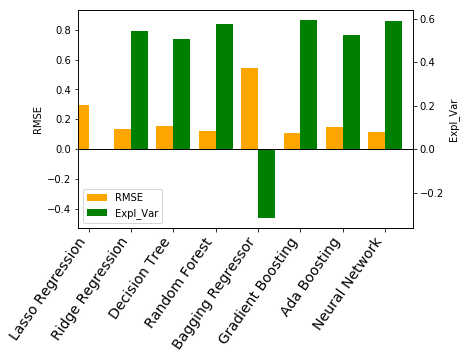

In [48]:
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax1 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

perf_df.RMSE.plot(kind='bar', color='orange', ax=ax, width=width, position=1, label='RMSE')
perf_df.Expl_Var.plot(kind='bar', color='green', ax=ax, width=width, position=0, label='Expl_Var')

ax.set_xticklabels(idx,fontsize=14,rotation=55, horizontalalignment="right")

ax.axhline(y=0,linewidth=1, color='black')
ax.set_ylabel('RMSE')
ax1.set_ylabel('Expl_Var')
align_yaxis(ax, 0, ax1, 0)
ax.legend()

In [49]:
['Random Forest','Gradient Boosting','Neural Network']

['Random Forest', 'Gradient Boosting', 'Neural Network']

***
# Three best performing models 'Random Forest', 'Gradient Boosting', 'Neural Network'

## Random Forest
#### get rf data

In [86]:
header = list(df)
rf_selected = ['boosts', 'damageDealt', 'killPlace', 'kills', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance', 'walkDistance', 'weaponsAcquired']
find_col_index = lambda tot, select: [i for i in range(len(tot)) if tot[i] in select]
idxs = find_col_index(header, Selected)
print(idxs)
rf_data_train = data_train[:,idxs].copy()
rf_data_test = data_test[:,idxs].copy()

[1, 6, 8, 9, 11, 12, 13, 14, 16, 18, 21, 22]


## Grid Search

In [87]:
# param_name = 'n_estimators'
# # param_list = [10, 30, 50, 70, 90, 110] ## no change
# param_list = [5,10,15,20,25,30]

# param_name = 'max_depth'
# param_list = [5,10,15,20,25,30]

# param_name = 'min_samples_split'
# # param_list = [2,4,6,8,10,12] ## no change  (RMSE: 0.11, Expl Var: 0.87)
# # param_list = [10, 30, 50, 70, 90, 110] ## no change
# param_list = [100, 200, 300, 400, 500] ## 

# param_name = 'bootstrap'
# param_list = [True, False] ## false is slighty better

'''Already try above independently'''

param1_name = 'n_estimators'
n_estimators = [5,15,25]

param2_name = 'max_depth'
max_depth = [5,20,30]

param3_name = 'min_samples_split'
min_samples_split = [100, 300, 500]

for p1 in n_estimators:
    for p2 in max_depth:
        for p3 in min_samples_split:
            start_ts=time.time()
            rgr = RandomForestRegressor(bootstrap=False, random_state=rand_st)
            d = {param1_name:p1, param2_name:p2,param3_name:p3}
            rgr.set_params(**d)
            scores = cross_validate(rgr, rf_data_train, target_train, scoring=scorers, cv=5)                                                                                                  

            scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
            scores_Expl_Var = scores['test_expl_var']
            print('Parameter: ', d)
            print("Random Forest RMSE: {} (+/- {})".format(scores_RMSE.mean(), scores_RMSE.std()*2))
            print("Random Forest Expl Var: {} (+/- {})".format(scores_Expl_Var.mean(), scores_Expl_Var.std()*2))
            print("CV Runtime:", time.time()-start_ts)
            print('-'*40)

Parameter:  {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 100}
Random Forest RMSE: 0.08543517377748303 (+/- 0.0006377865976418008)
Random Forest Expl Var: 0.9163043249547066 (+/- 0.0010515098660914266)
CV Runtime: 18.756714582443237
----------------------------------------
Parameter:  {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 300}
Random Forest RMSE: 0.08543517377748303 (+/- 0.0006377865976418008)
Random Forest Expl Var: 0.9163043249547066 (+/- 0.0010515098660914266)
CV Runtime: 18.701860666275024
----------------------------------------
Parameter:  {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 500}
Random Forest RMSE: 0.08543517377748303 (+/- 0.0006377865976418008)
Random Forest Expl Var: 0.9163043249547066 (+/- 0.0010515098660914266)
CV Runtime: 18.699308156967163
----------------------------------------
Parameter:  {'n_estimators': 5, 'max_depth': 20, 'min_samples_split': 100}
Random Forest RMSE: 0.06221812758821229 (+/- 0.0004940832563494244)
Ra

###############################################################################################################
## Gradient Boosting
#### get gb data

In [88]:
header = list(df)
gb_selected = ['boosts', 'killPlace', 'kills', 'killStreaks', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance', 'swimDistance', 'walkDistance', 'weaponsAcquired']
find_col_index = lambda tot, select: [i for i in range(len(tot)) if tot[i] in select]
idxs = find_col_index(header, gb_selected)
print(idxs)
gb_data_train = data_train[:,idxs].copy()
gb_data_test = data_test[:,idxs].copy()

[1, 6, 8, 9, 11, 12, 13, 14, 16, 18, 21, 22]


## Grid Search

In [91]:
# param_name = 'n_estimators'
# param_list = [50,100,150,200]  ## no too much change

# param_name = 'loss'
# param_list = ['ls', 'lad', 'huber', 'quantile'] ## huber is slightly better

# param_name = 'subsample'
# param_list = [0.2, 0.4, 0.6, 0.8, 1]  ## no too much change

# param_name = 'max_features' 
# param_list = [0.2, 0.4, 0.6, 0.8, 1] ## 0.2 is singnificantly worse

'''Already try above independently'''

param1_name = 'n_estimators'
n_estimators = [50,100,150]

param2_name = 'subsample'
subsample = [0.2, 0.6, 1]

param3_name = 'max_features'
max_features = [0.4, 0.6, 1]

for p1 in n_estimators:
    for p2 in subsample:
        for p3 in max_features:
            start_ts=time.time()
            rgr = GradientBoostingRegressor(loss='huber', random_state=rand_st)
            d = {param1_name:p1, param2_name:p2, param3_name:p3}
            rgr.set_params(**d)
            scores = cross_validate(rgr, gb_data_train, target_train, scoring=scorers, cv=5)                                                                                                  

            scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
            scores_Expl_Var = scores['test_expl_var']
            print('Parameter: ', d)
            print("Gradient Boosting RMSE: {} (+/- {})".format(scores_RMSE.mean(), scores_RMSE.std()*2))
            print("Gradient Boosting Expl Var: {} (+/- {})".format(scores_Expl_Var.mean(), scores_Expl_Var.std()*2))
            print("CV Runtime:", time.time()-start_ts)
            print('-'*40)

Parameter:  {'n_estimators': 50, 'subsample': 0.2, 'max_features': 0.4}
Gradient Boosting RMSE: 0.0745424162469996 (+/- 0.0013194739040930177)
Gradient Boosting Expl Var: 0.9363006836737059 (+/- 0.0018909690509728565)
CV Runtime: 41.62801671028137
----------------------------------------
Parameter:  {'n_estimators': 50, 'subsample': 0.2, 'max_features': 0.6}
Gradient Boosting RMSE: 0.07268438457124708 (+/- 0.0007772985049290327)
Gradient Boosting Expl Var: 0.939441458645909 (+/- 0.0009931478662758388)
CV Runtime: 49.23215341567993
----------------------------------------
Parameter:  {'n_estimators': 50, 'subsample': 0.2, 'max_features': 1}
Gradient Boosting RMSE: 0.10159894362459773 (+/- 0.00401713095866006)
Gradient Boosting Expl Var: 0.881612755104998 (+/- 0.00969083491129041)
CV Runtime: 33.251896381378174
----------------------------------------
Parameter:  {'n_estimators': 50, 'subsample': 0.6, 'max_features': 0.4}
Gradient Boosting RMSE: 0.07455778692046347 (+/- 0.001417352145164

###################################################################################################################################################################
## NN Regressor - Grid Search

In [100]:
# param_name = 'activation'
# param_list = ['identity','logistic','tanh','relu']  ## relu is the best

# param_name = 'solver'
# param_list = ['sgd','adam']  ## adam is better

# param_name = 'alpha'
# param_list = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]  ## 0.001~0.0001 has the optimum

# param_name = 'learning_rate_init'
# param_list = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001] ## 0.01~0.001 has the optimum

# param_name = 'hidden_layer_sizes'
# param_list = [(30,), (70,),(100,),(130,),(170,),(200,), (230,), (260,), (300,)] ## no too much change

# param_name = 'hidden_layer_sizes'
# param_list = [(15,15,), (30,30,),(60,60,),(90,90,)] ## no change

# param_name = 'hidden_layer_sizes'
# param_list = [(5,5,5,), (10,10,10,),(15,15,15,),(20,20,20,)]  ## (15,15,15,),(20,20,20,)

'''Already try above independently'''

param1_name = 'alpha'
alpha = [0.001, 0.0005, 0.0001]

param2_name = 'learning_rate_init'
learning_rate_init = [0.01, 0.005, 0.001]

param3_name = 'hidden_layer_sizes'
hidden_layer_sizes = [(30,), (100,), (170,),
                      (15,15,),
                      (15,15,15,), (20,20,20,)]

for p1 in alpha:
    for p2 in learning_rate_init:
        for p3 in hidden_layer_sizes:
            start_ts=time.time()
            rgr = MLPRegressor(activation='relu',
                               solver='adam',
                               random_state=rand_st)
            d = {param1_name:p1, param2_name:p2, param3_name:p3}
            rgr.set_params(**d)
            scores = cross_validate(rgr, data_train, target_train, scoring=scorers, cv=5)                                                                                                  

            scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
            scores_Expl_Var = scores['test_expl_var']
            print('Parameter: ', d)
            print("Neural Network RMSE: {} (+/- {})".format(scores_RMSE.mean(), scores_RMSE.std()*2))
            print("Neural Network Expl Var: {} (+/- {})".format(scores_Expl_Var.mean(), scores_Expl_Var.std()*2))
            print("CV Runtime:", time.time()-start_ts)
            print('-'*40)

Parameter:  {'alpha': 0.001, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (30,)}
Neural Network RMSE: 0.0609606782737814 (+/- 0.005168757047597565)
Neural Network Expl Var: 0.9601510455346997 (+/- 0.0006937432584643589)
CV Runtime: 17.680362939834595
----------------------------------------
Parameter:  {'alpha': 0.001, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (100,)}
Neural Network RMSE: 0.05987325982450979 (+/- 0.0016585066091586345)
Neural Network Expl Var: 0.9604468599943286 (+/- 0.0008635101462022288)
CV Runtime: 27.37159299850464
----------------------------------------
Parameter:  {'alpha': 0.001, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (170,)}
Neural Network RMSE: 0.06095877443261884 (+/- 0.003839552157319702)
Neural Network Expl Var: 0.960101749581417 (+/- 0.0026507380009245613)
CV Runtime: 38.53404927253723
----------------------------------------
Parameter:  {'alpha': 0.001, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (15, 15)}
Neural Network RMS

###############################################################################################################################################################
## Test the models

In [92]:
from sklearn.metrics import mean_squared_error, explained_variance_score
from math import sqrt
import re, json

## Random Forest

In [93]:
header = list(df)
rf_selected = ['boosts', 'damageDealt', 'killPlace', 'kills', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance', 'walkDistance', 'weaponsAcquired']
find_col_index = lambda tot, select: [i for i in range(len(tot)) if tot[i] in select]
idxs = find_col_index(header, rf_selected)
print(idxs)
rf_data_train = data_train[:,idxs].copy()
rf_data_test = data_test[:,idxs].copy()

[1, 2, 6, 8, 10, 11, 12, 13, 14, 16, 21, 22]


In [94]:
'''
min_rmse:  0.06221812758821229
max_expl_var:  0.9556109938109796

Parameter:  {'n_estimators': 5, 'max_depth': 20, 'min_samples_split': 100}
RMSE: 0.06221812758821229
Expl_var: 0.9556109938109796
----------------------------------------
'''

"\nmin_rmse:  0.06221812758821229\nmax_expl_var:  0.9556109938109796\n\nParameter:  {'n_estimators': 5, 'max_depth': 20, 'min_samples_split': 100}\nRMSE: 0.06221812758821229\nExpl_var: 0.9556109938109796\n----------------------------------------\n"

In [97]:
best_parmas = {'n_estimators': 5, 'max_depth': 20, 'min_samples_split': 100}
start_ts=time.time()
rgr = RandomForestRegressor(bootstrap=False, random_state=rand_st)
rgr.set_params(**best_parmas)
rgr.fit(rf_data_train, target_train)
pred = rgr.predict(rf_data_test)

rmse = sqrt(mean_squared_error(target_test, pred))
expl_var = explained_variance_score(target_test, pred)

print('Testing:')
print('Parameters: ', rgr.get_params)
print("Random Forest RMSE: ", rmse)
print("Random Forest Expl Var: ", expl_var)
print("CV Runtime:", time.time()-start_ts)
print('-'*40)

Testing:
Parameters:  <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=920, verbose=0, warm_start=False)>
Random Forest RMSE:  0.06219631009785581
Random Forest Expl Var:  0.9554408621038495
CV Runtime: 15.422634601593018
----------------------------------------


## Gradient Boosting

In [96]:
header = list(df)
gb_selected = ['boosts', 'killPlace', 'kills', 'killStreaks', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance', 'swimDistance', 'walkDistance', 'weaponsAcquired']
find_col_index = lambda tot, select: [i for i in range(len(tot)) if tot[i] in select]
idxs = find_col_index(header, gb_selected)
print(idxs)
gb_data_train = data_train[:,idxs].copy()
gb_data_test = data_test[:,idxs].copy()

[1, 6, 8, 9, 11, 12, 13, 14, 16, 18, 21, 22]


In [78]:
'''
min_rmse:  0.06372601695674573
max_expl_var:  0.9534587714381273

Parameter:  {'n_estimators': 150, 'subsample': 1, 'max_features': 0.6}
RMSE: 0.06372601695674573
Expl_var: 0.9534587714381273	
----------------------------------------
'''

In [98]:
best_parmas = {'n_estimators': 150, 'subsample': 1, 'max_features': 0.6}

start_ts=time.time()
rgr = GradientBoostingRegressor(loss='huber', random_state=rand_st)
rgr.set_params(**best_parmas)
rgr.fit(gb_data_train, target_train)
pred = rgr.predict(gb_data_test)

rmse = sqrt(mean_squared_error(target_test, pred))
expl_var = explained_variance_score(target_test, pred)

print('Testing:')
print('Parameters: ', rgr.get_params)
print("Gradient Boosting RMSE: ", rmse)
print("Gradient Boosting Expl Var: ", expl_var)
print("CV Runtime:", time.time()-start_ts)
print('-'*40)

Testing:
Parameters:  <bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features=0.6, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             presort='auto', random_state=920, subsample=1, verbose=0,
             warm_start=False)>
Gradient Boosting RMSE:  0.06421418800958437
Gradient Boosting Expl Var:  0.9525425229470118
CV Runtime: 60.28284978866577
----------------------------------------


## Neural Network

In [ ]:
'''
min_rmse:  0.05698105656841629
max_expl_var:  0.9633089555905461

Parameter:  {'alpha': 0.0005, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (170,)}
RMSE: 0.05698105656841629
Expl_var: 0.9632601740136246	
----------------------------------------
'''

In [104]:
configs = {'Parameter1':  {'alpha': 0.0005, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (170,)},
            'Parameter2':  {'alpha': 0.0001, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (170,)}}

for _, best_parmas in configs.items():
    start_ts=time.time()
    rgr = MLPRegressor(activation='relu',
                            solver='adam',
                            random_state=rand_st)
    rgr.set_params(**best_parmas)
    rgr.fit(data_train, target_train)
    pred = rgr.predict(data_test)

    rmse = sqrt(mean_squared_error(target_test, pred))
    expl_var = explained_variance_score(target_test, pred)

    print('Testing:')
    print('Parameters: ', rgr.get_params)
    print("Neural Network RMSE: ", rmse)
    print("Neural Network Expl Var: ", expl_var)
    print("CV Runtime:", time.time()-start_ts)
    print('-'*40)

Testing:
Parameters:  <bound method BaseEstimator.get_params of MLPRegressor(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(170,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=920,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)>
Neural Network RMSE:  0.05777639868387338
Neural Network Expl Var:  0.9619937657547195
CV Runtime: 11.65286374092102
----------------------------------------
Testing:
Parameters:  <bound method BaseEstimator.get_params of MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(170,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum